<a href="https://colab.research.google.com/github/ttruong1000/MAT-494-Mathematical-Methods-for-Data-Science/blob/main/3_5_K_Means_3_6_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3.5 - $k$-Means**

### **3.5.0 - Python Libraries for $k$-Means**

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

### **3.5.1 - $k$-Means**

$k$-means clustering is a popular method of vector quantization that aims to
partition $n$ observations into $k$ clusters in which each observation belongs
to the cluster with the nearest mean (cluster centers or cluster centroid),
serving as a prototype of the cluster. $k$-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances. While $k$-means generally converge quickly to a local optimum, the problem is computationally difficult (NP-hard).

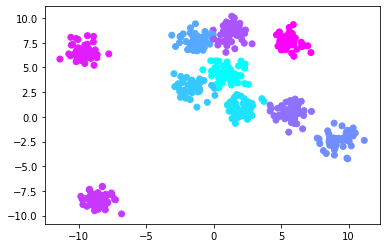

In [20]:
X, y = make_blobs(n_samples=500, centers=10, cluster_std=0.70, random_state=0)
plt.scatter(X[:,0], X[:,1], c = y, cmap='cool')

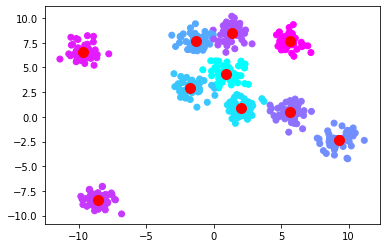

In [22]:
kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c = y, cmap='cool')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

Given an observation vector $(x_1, x_2, \ldots, x_n)$, where each observation $x_i$ is a $d$-dimensional real vector, $k$-means clustering aims to partition the $n$ observations into $k < n$ sets $S = \{S_1, S_2, \ldots, S_k\}$ so as to minimize the within-cluster sum of squares (WCSS, or variance), the squared distance of each vector from its centroid summed over all vectors
\begin{equation*}
  \text{WCSS}_i = \sum_{x \in S_i} ||x - \mu(S_i)||^2
\end{equation*}
where $\mu(S_i)$ is the mean of points in $S_i$,
\begin{equation*}
  \mu_{S_i} - \frac{1}{|S|}\sum_{\mathbf{x} \in S} \mathbf{x}
\end{equation*}
The objective is to find the value of
\begin{equation*}
  \text{arg } \min_S \sum_{i = 1}^k \text{WCSS}_i
\end{equation*}

##### Definition 3.5.1.1 - $k$-Means Clustering Algorithm

1. Cluster the data into $k$ groups where $k$ is predefined.
2. Select $k$ points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3, and 4 until the same points are assigned to each cluster in consecutive rounds.

We now show that $k$-means converges by proving that $\displaystyle\sum_{i = 1}^k \text{WCSS}_i$ monotonicaly decreases in each iteration. First, $\displaystyle\sum_{i = 1}^k \text{WCSS}_i$ decreases in the reassignment step since each vector is assigned to the closest centroid, so the distance it contributes to $\displaystyle\sum_{i = 1}^k \text{WCSS}_i$ decreases. Second, it decreases in the recomputation step because the new centroid is the vector $\mathbf{v}$ for which $\text{WCSS}_i$ reaches its minimum.
\begin{equation*}
  \text{WCSS}_i(\mathbf{v}) = \sum_{\mathbf{x} = (x_j) \in S_i}|\mathbf{v} - \mathbf{x}|^2 = \sum_{\mathbf{x} = (x_j) \in S_i}\sum_{j = 1}^d (v_j - x_j)^2
\end{equation*}
\begin{equation*}
  \frac{\partial \text{WCSS}_i(\mathbf{v})}{\partial v_m} = \sum_{\mathbf{x} = (x_j) \in S_i} 2(v_m - x_m)
\end{equation*}
where $x_m$ and $v_m$ are the $m^{\text{th}}$ components of their respective vectors. Setting the partial derivative to zero, we get
\begin{equation*}
  \mathbf{v} = \frac{1}{|S_i|}\sum_{\mathbf{x} = (x_j) \in S_i} x_j
\end{equation*}
which is the componentwise definition of the centroid. Thus, we minimize $\text{WCSS}_i$ when the old centroid is replaced with the new centroid. The sum of the $\text{WCSS}_i$ must then also decrease during recomputation.

### **3.5.2 - References**

1. MAT 494 Chapter 3 Notes

# **3.6 - Support Vector Machines**

### **3.6.0 - Python Libraries for Support Vector Machines**

In [2]:
import numpy as np
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

### **3.6.1 - Support Vector Machines**

Support-vector machines (SVMs) are supervised learning models in machine learning, which aim to analyze data for classification and regression analysis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other. The objective of the support vector machine algorithm is to find a hyperplane in a high dimensional space of the number of features that distinctly classifies the data points. An SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. Predictions of new data are based on which side of the gap they fall.

As is shown in Figure 3.13, We are given a training dataset of $n$ points of the form $(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \ldots, (\mathbf{x}_n, y_n)$, where the $y_i$ are either $-1$ or $1$, each indicating the class to which the point $\mathbf{x}_i$ belongs. Each $x_i$ is a $p$-dimensional real vector. We want to maximize the margin distance of hyperplanes that divides the group of points $x_i$ for which $y_i = 1$ from the group of points for which $y_i = -1$. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

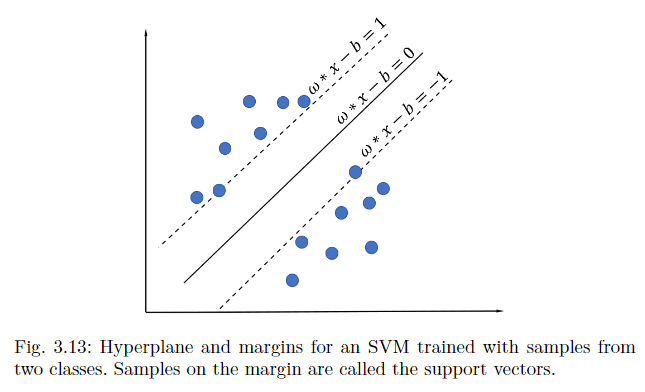

A hyperplane can be written as the set of points $\mathbf{x}$ satisfying $\mathbf{w}^T\mathbf{x} - b = 0$, where $\mathbf{w}$ is the normal vector to the hyperplane. If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum margin hyperplane is the hyperplane that lies halfway between them as in Figure 3.13. We are interested in two regions: anything on or above this boundary is of one class, with label 1 and anything on or below this boundary is of the other class, with label $-1$. The two hyperplanes can be respectively described by the equations
\begin{equation*}
  \mathbf{w}^T\mathbf{x} - b = 1
\end{equation*}
and
\begin{equation*}
  \mathbf{w}^T \mathbf{x} - b = -1
\end{equation*}
We wish all data points to fall into the margin, which can be expressed as for each $i$ either
\begin{equation*}
  \mathbf{w}^T\mathbf{x}_i - b \geq 1, \text{ if } y_i = 1
\end{equation*}
or
\begin{equation*}
  \mathbf{w}^T\mathbf{x}_i - b \leq 1, \text{ if } y_i = -1
\end{equation*}
Together the two constraints that each data point must lie on the correct side of the margin, can be rewritten as
\begin{equation*}
  y_i(\mathbf{w}^T\mathbf{x}_i - b) \geq 1, \text { for all } 1 \leq i \leq n
\end{equation*}
We can put this together to get the optimization problem. The goal of the optimization then is to minimize
\begin{equation*}
  \min_{\mathbf{w}, \mathbf{b}}\left\langle\underbrace{\lambda\|\mathbf{w}\|^{2}}_{\text {regularizer }} + \frac{1}{n} \underbrace{\sum_{i=1}^{n} \max \left\{0,1 - y_i\left(\left\langle\mathbf{w}, \mathbf{x}_i\right\rangle - b\right)\right\}}_{\text {error term }}\right\rangle
\end{equation*}
which minimizes $||\mathbf{w}||$ subject to $y_i\left(\mathbf{w}^T\mathbf{x}_i - b\right) \geq 1$, for all $1 \leq i \leq n$. The first term above is called the regularization term which arises directly from the margin. The parameter $\lambda$ adjusts the trade-off between increasing the margin size and ensuring that $\mathbf{x}_i$ lie on the correct side of the margin while we choose the distance of two hyperplanes to be $\frac{2}{||\mathbf{w}||}$.

In principle, the unconstrained optimization problem can be directly solved with gradient descent methods. Because this function is convex in $\mathbf{w}$ we can easily apply a gradient descent method to find the minimum. For example. with stochastic gradient descent, pick an $i$ at random and update according to
\begin{equation*}
  \text{New $b$ = Old $b$ - }\beta\begin{cases}y_{i} & \text { if } 1-y_{i}\left(\mathbf{w}^{T} \mathbf{x}_{i}-b\right)>0 \\ 0 & \text { otherwise }\end{cases}
\end{equation*}
and
\begin{equation*}
  \text{New $\mathbf{w}$ = Old $\mathbf{w}$ - }\beta\begin{cases}2 \lambda \mathbf{w}-\frac{1}{n} y_{i} \mathbf{x}_{i} & \text { if } 1-y_{i}\left(\mathbf{w}^{T} \mathrm{x}_{i}-b\right)>0 \\ 2 \lambda \mathbf{w} & \text { otherwise }\end{cases}
\end{equation*}

### **3.6.2 - References**

1. MAT 494 Chapter 3 Notes